In [4]:
import numpy as np
import pandas as pd
from pandas import read_csv
from pandas import DataFrame
from datetime import datetime
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from pandas import concat

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import GRU
from keras.layers import Dropout
from numpy import concatenate

from sklearn.metrics import mean_squared_error
from math import sqrt

from scipy import interpolate
import matplotlib.pyplot as plt
import matplotlib as mpl

from keras import Input, Model
from keras.layers import Dense
%matplotlib inline
plt.rcParams['figure.figsize'] = (30.0, 20.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'


ParserError: Error tokenizing data. C error: Expected 1 fields in line 30, saw 367


C:\Users\USER\AppData\Local\Temp\ipykernel_7644\1303190778.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(len(groups), 1, i)


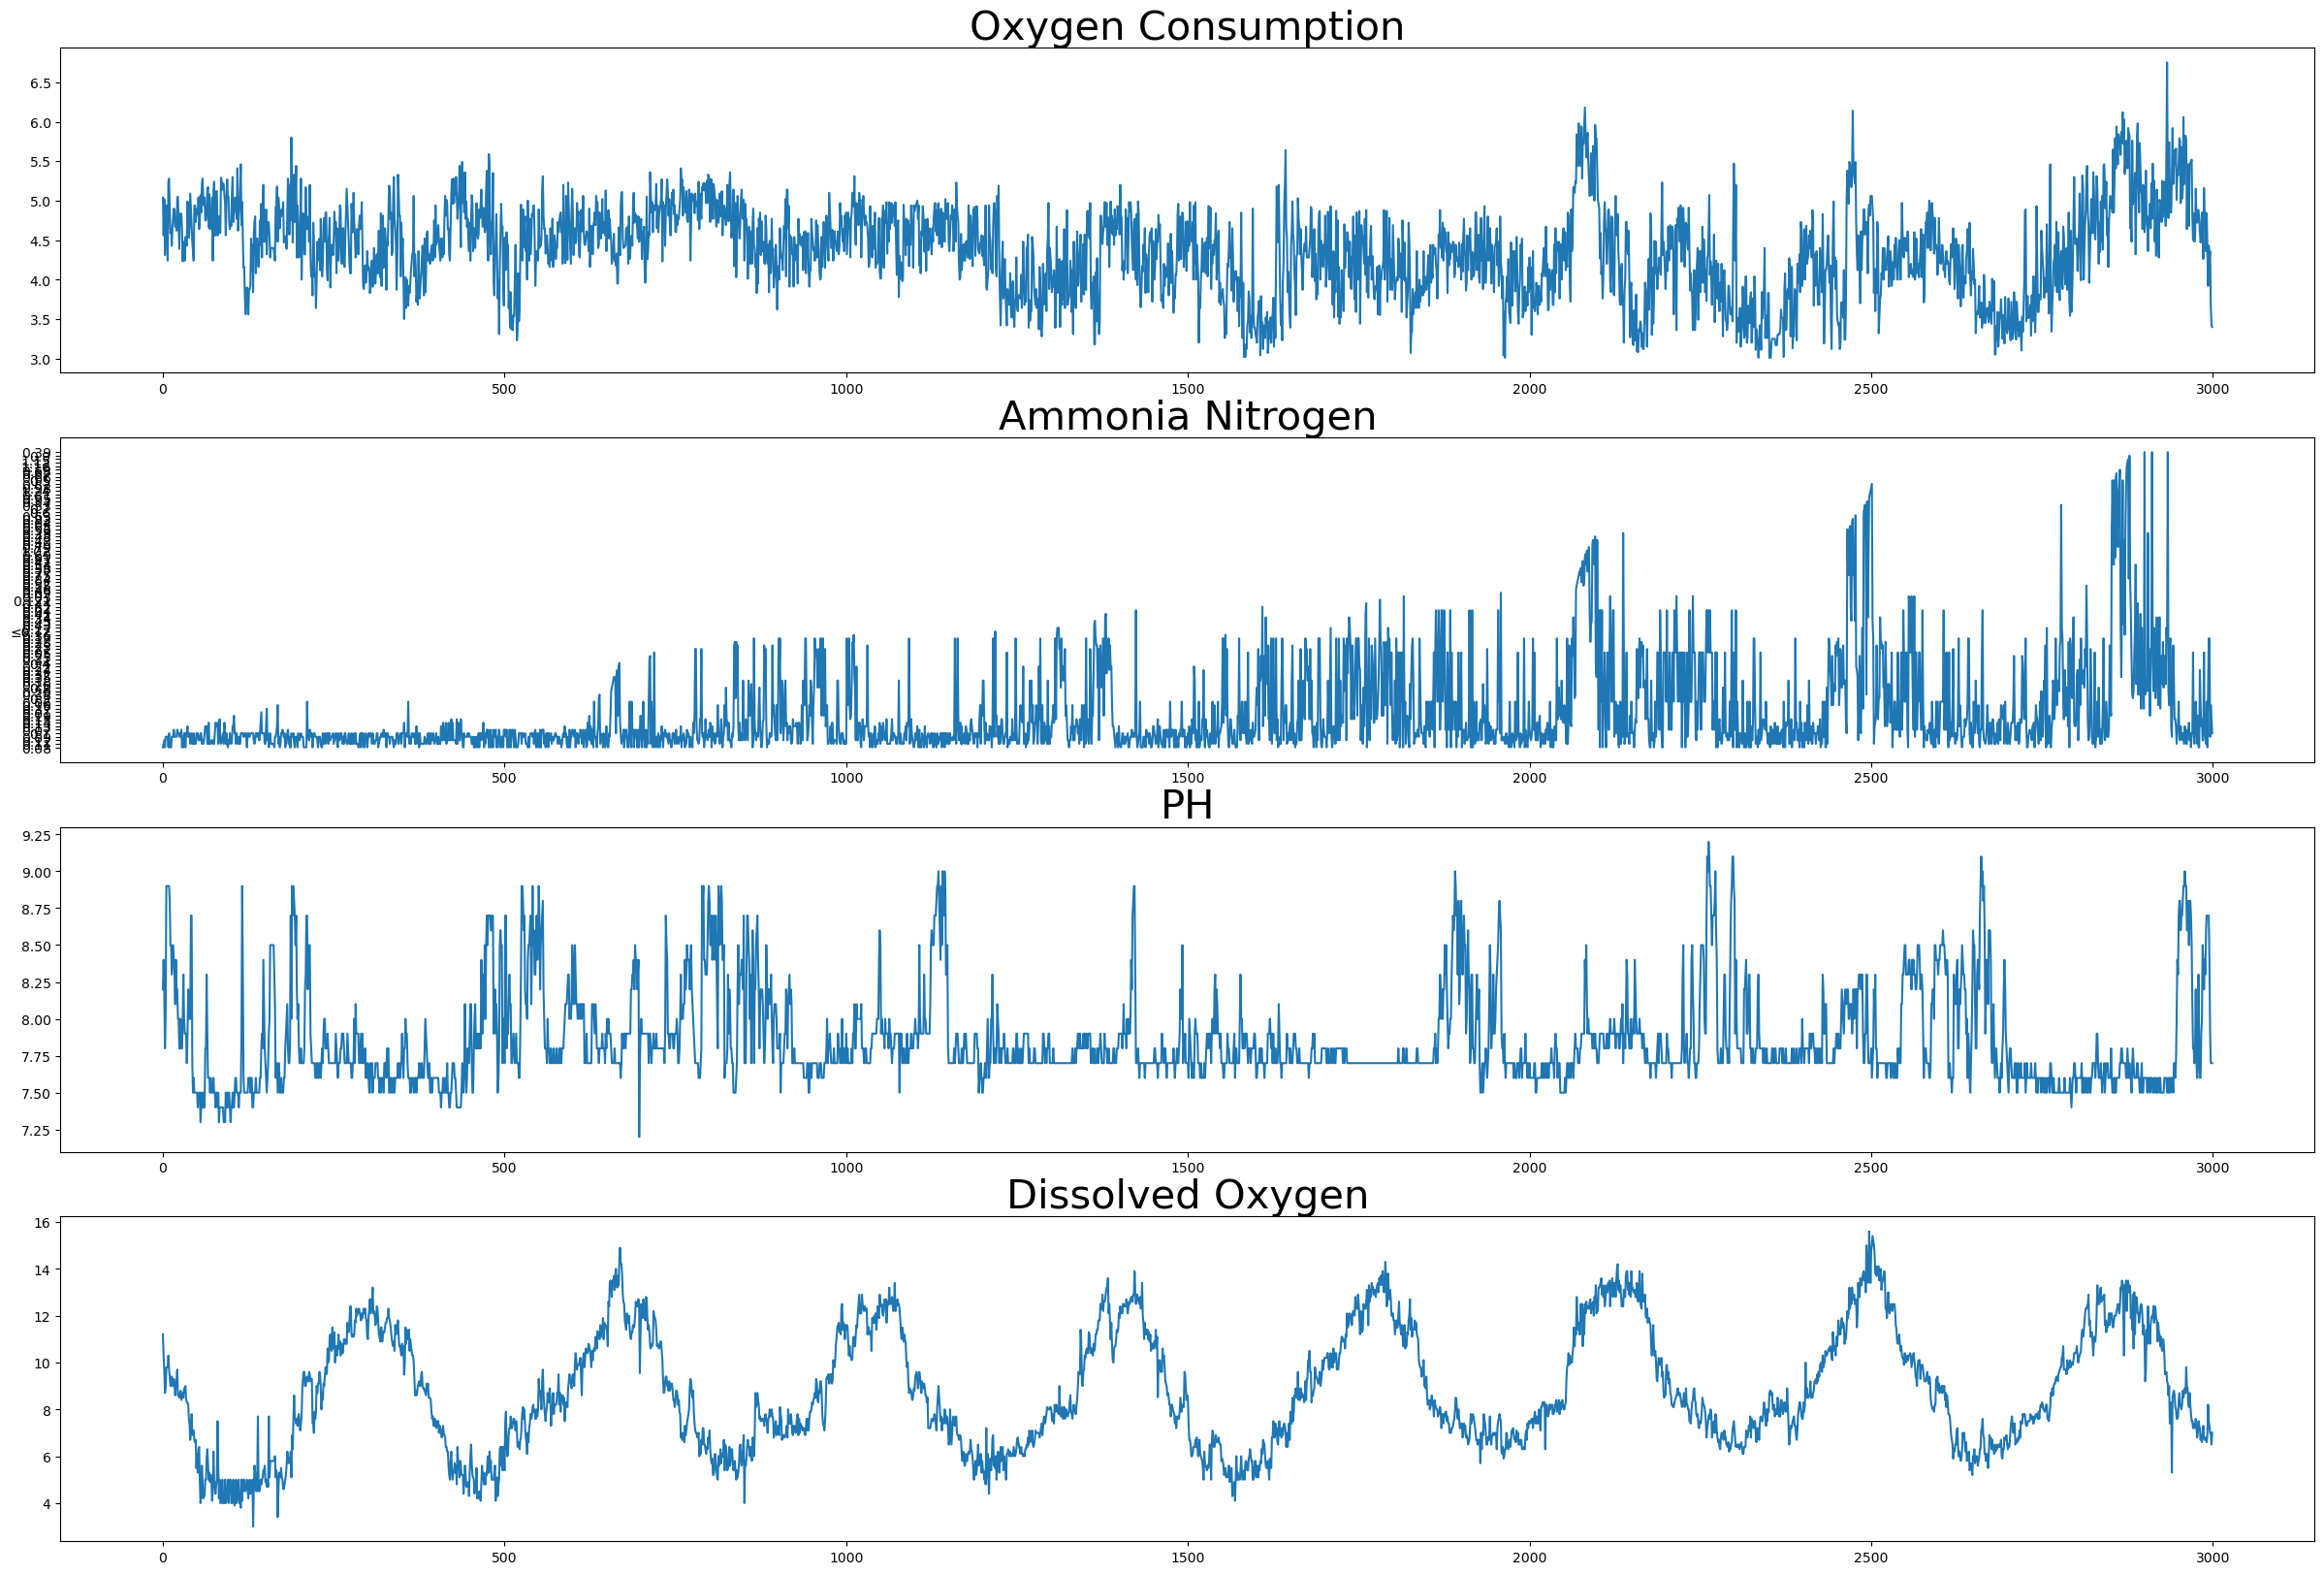

In [12]:
dataset = pd.read_csv(r'C:\Users\USER\Desktop\Water Quality Record.txt', header=0, index_col=0, parse_dates=True)
values = dataset.values
groups = [ 0, 1, 2, 3]
fig, axs = plt.subplots(1)
i = 1
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(dataset.columns[group], fontsize=30)
    i+=1
plt.show()

In [13]:
df=pd.DataFrame(dataset)
do=df['Dissolved Oxygen']
oc=df['Oxygen Consumption']
an=df['Ammonia Nitrogen']

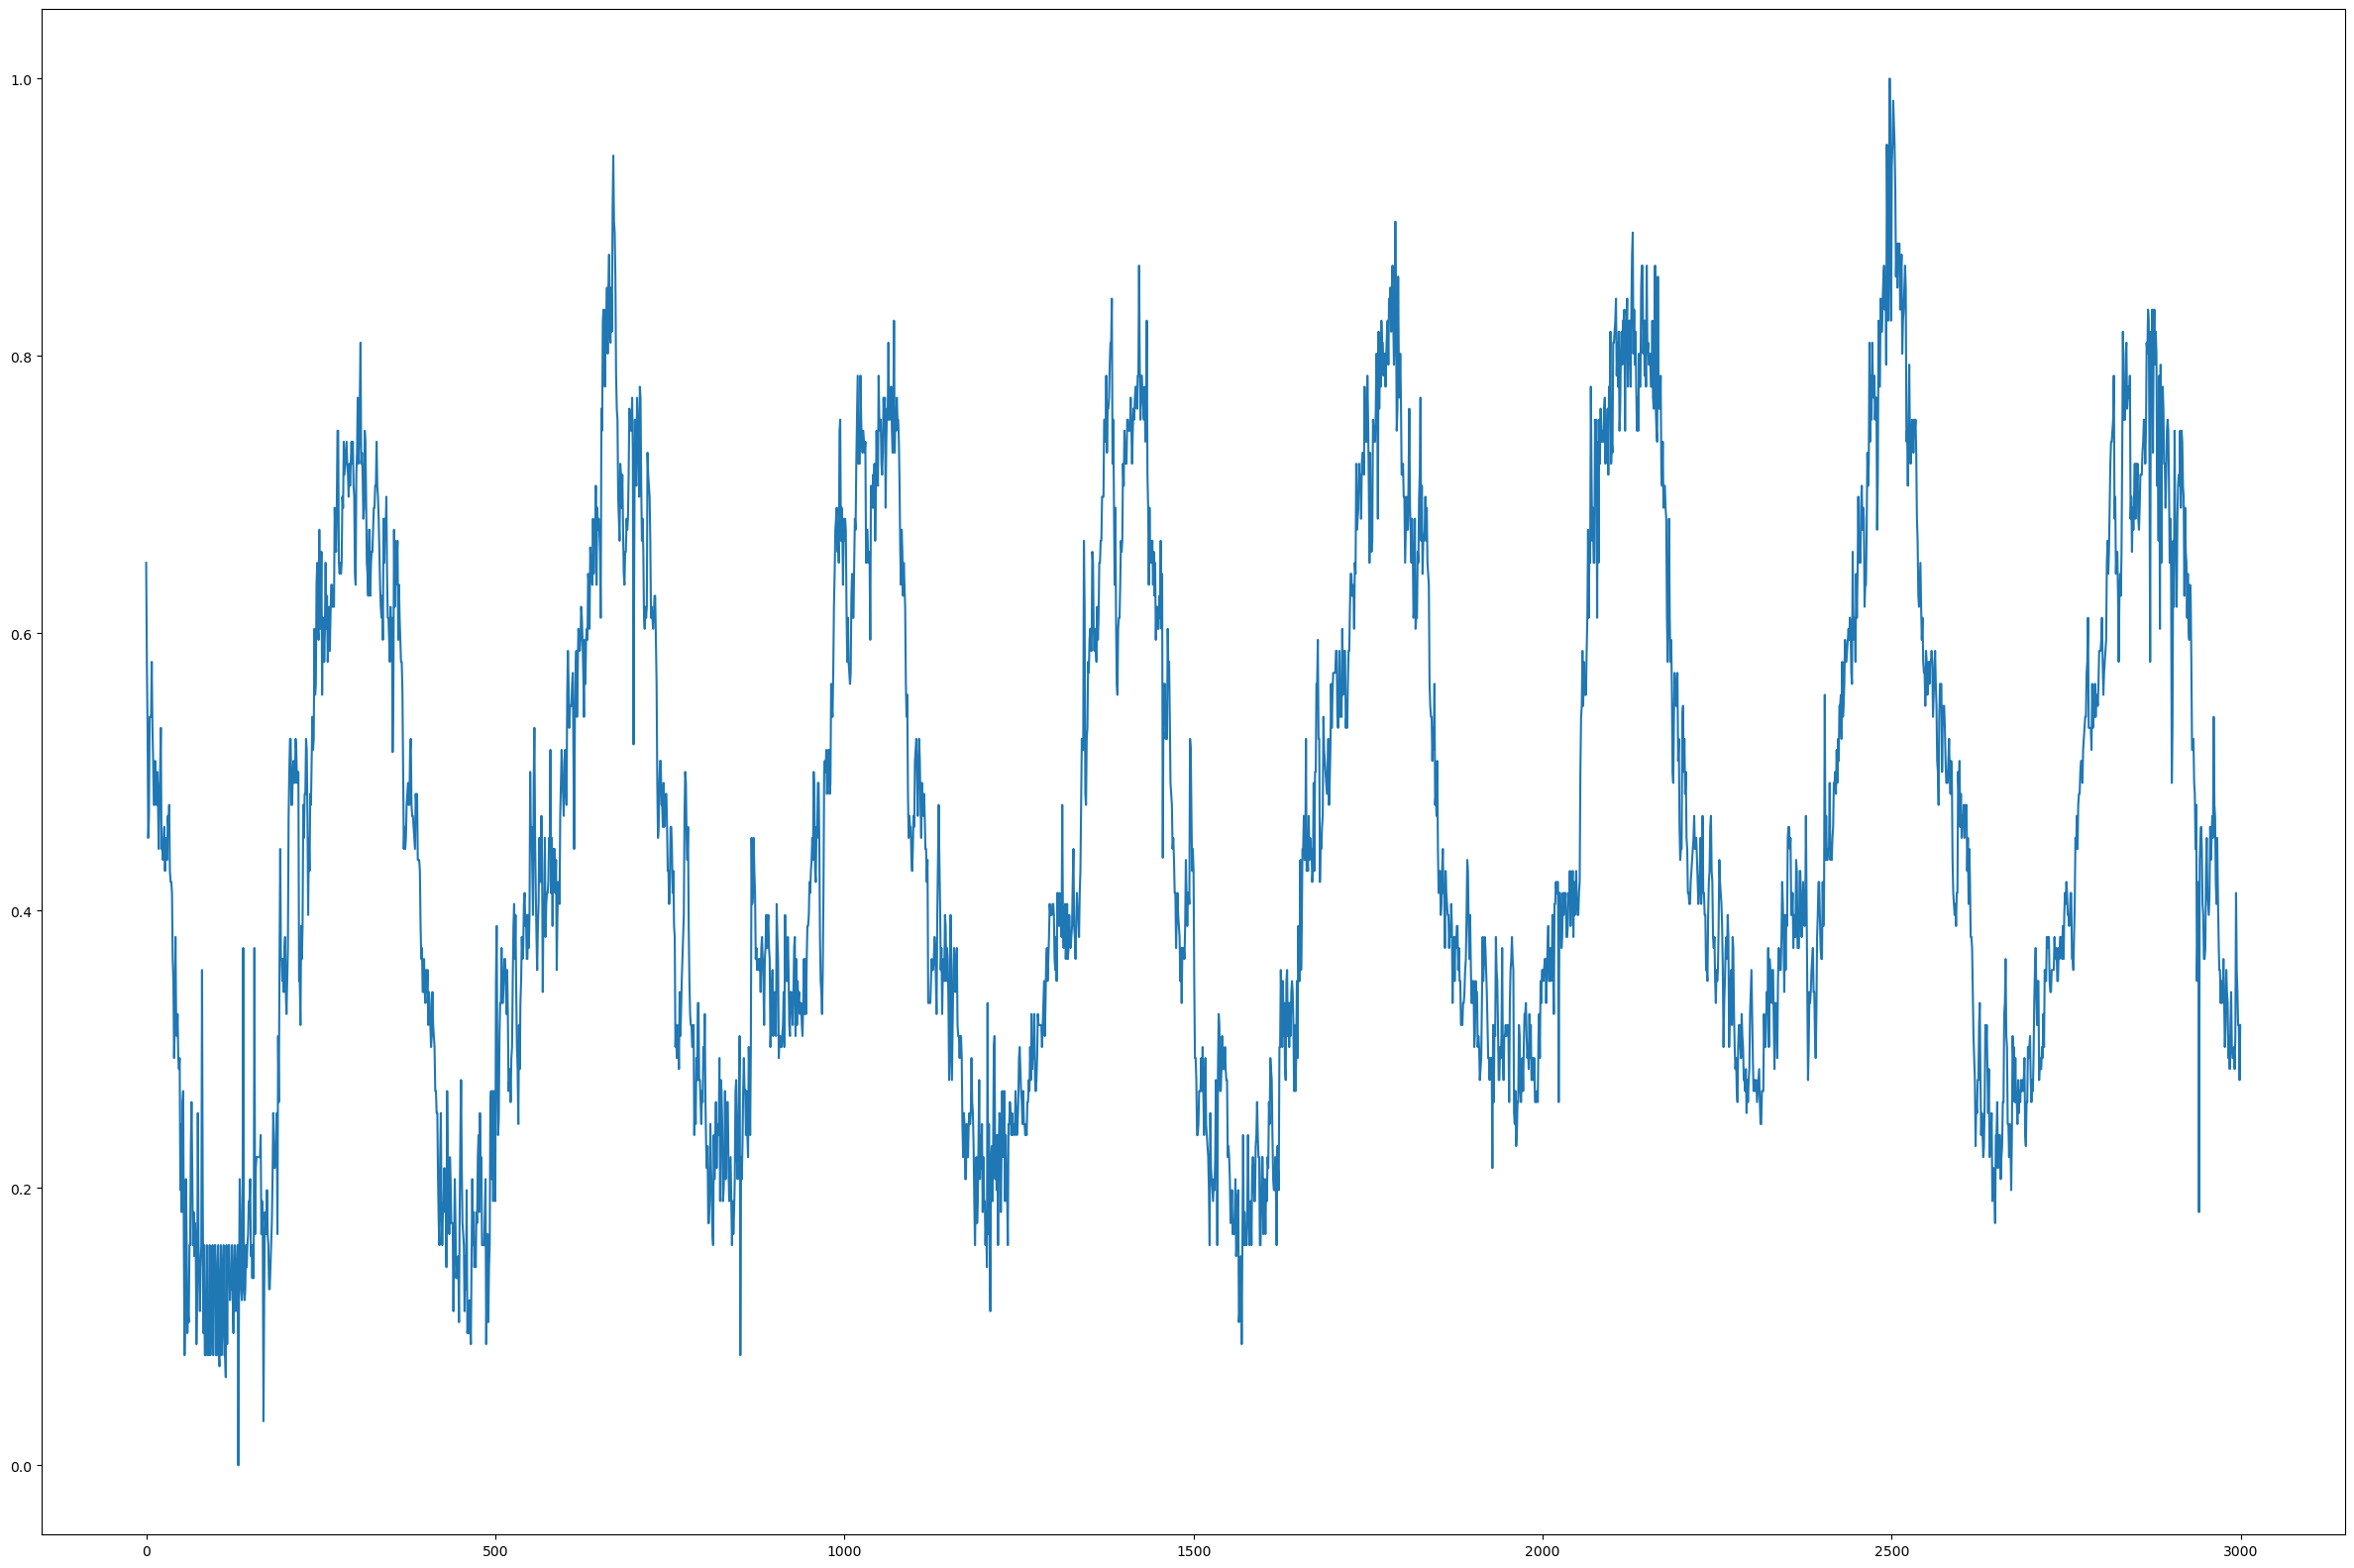

In [14]:
DO=[]
for i in range(0,len(do)):  
    DO.append([do[i]])
scaler_DO = MinMaxScaler(feature_range=(0,1))  
DO = scaler_DO.fit_transform(DO)
plt.plot(DO)
#I tried both MinMax scaler and Standard scaler
#(which is Z score standardization), and MinMaxScaler has obrious better result

In [16]:
def data_split_LSTM(X_train,y_train, X_test, y_test, lookback_windows): #data split for LSTM is also fit to GRU
    # reshape the data to satisfy the input acquirement of LSTM
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)
    y_train = y_train.reshape(y_train.shape[0], 1)
    y_test = y_test.reshape(y_test.shape[0], 1)
    
    return (X_train, y_train, X_test, y_test)
#Visualization
def visualize(history):
    plt.rcParams['figure.figsize'] = (10.0, 6.0)
    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
'''def TCN_Model(X_train, y_train, lookback_window):
    i = Input(shape=(lookback_window, 1))
    m = TCN()(i)
    m = Dense(1, activation='linear')(m)
    model = Model(inputs=[i], outputs=[m])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=5, validation_split=0.1, shuffle=True, verbose=1)
    return (model)'''
def LSTM_Model(X_train, y_train):
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    model.fit(X_train, y_train, epochs=5,  batch_size=1,  validation_split=0.1, verbose=1, shuffle=True) 
    return(model)
#batch_size=1 has the best result, although its disadvantage is it needs much longer time
def GRU_Model(X_train, y_train):
    model = Sequential()
    model.add(GRU(50, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer='adam')
    model.fit(X_train, y_train, epochs=5,  batch_size=1,  validation_split=0.1, verbose=1, shuffle=True)
    return(model)
c=int(len(df)*.9)

In [18]:
def data_split(data, train_len, lookback_window):
    train=data[:train_len]
    test=data[train_len:]
    X1, y1=[], []
    for i in range(lookback_window, len(train)):
        X1.append(train[i - lookback_window:i])
        y1.append(train[i])
        y_train = np.array(y1)
        X_train = np.array(X1)

    X2, y2=[], []
    for i in range(lookback_window, len(test)):
        X2.append(test[i - lookback_window:i])
        y2.append(test[i])
        y_test = np.array(y2)
        X_test = np.array(X2)
    
    return (X_train, y_train, X_test, y_test)

In [19]:
X1_train, y1_train, X1_test, y1_test =data_split(DO, c, 1) 
X2_train, y2_train, X2_test, y2_test = data_split_LSTM(X1_train, y1_train, X1_test, y1_test, 1)  #LSTM
X3_train, y3_train, X3_test, y3_test = data_split_LSTM(X1_train, y1_train, X1_test, y1_test, 1)  #GRU

In [20]:
model_DO_LSTM=LSTM_Model(X2_train, y2_train)

Epoch 1/5
2429/2429 [==============================] - 4s 1ms/step - loss: 0.0088 - val_loss: 0.0017
Epoch 2/5
2429/2429 [==============================] - 3s 1ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 3/5
2429/2429 [==============================] - 3s 1ms/step - loss: 0.0019 - val_loss: 0.0022
Epoch 4/5
2429/2429 [==============================] - 3s 1ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 5/5
2429/2429 [==============================] - 3s 1ms/step - loss: 0.0018 - val_loss: 0.0014


In [21]:
model_DO_GRU=GRU_Model(X3_train, y3_train)

Epoch 1/5
2429/2429 [==============================] - 4s 1ms/step - loss: 0.0058 - val_loss: 0.0017
Epoch 2/5
2429/2429 [==============================] - 3s 1ms/step - loss: 0.0019 - val_loss: 0.0018
Epoch 3/5
2429/2429 [==============================] - 3s 1ms/step - loss: 0.0019 - val_loss: 0.0014
Epoch 4/5
2429/2429 [==============================] - 3s 1ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 5/5
2429/2429 [==============================] - 3s 1ms/step - loss: 0.0019 - val_loss: 0.0016


In [22]:
y2_train_hat=model_DO_LSTM.predict(X2_train)
y2_train_hat=scaler_DO.inverse_transform(y2_train_hat)
y2_train=scaler_DO.inverse_transform(y2_train)

y2_test_hat=model_DO_LSTM.predict(X2_test)
y2_test_hat=scaler_DO.inverse_transform(y2_test_hat)
y2_test=scaler_DO.inverse_transform(y2_test)

10/10 [==============================] - 0s 999us/step


In [24]:
def plot_curve(true_data, predicted):
 
    plt.plot(true_data, label='True data')
    plt.plot(predicted, label='Predicted data')
    #plt.plot(predicted_LSTM, label='Predicted data by LSTM')
    plt.legend()
    plt.savefig('result.png')
    plt.show()

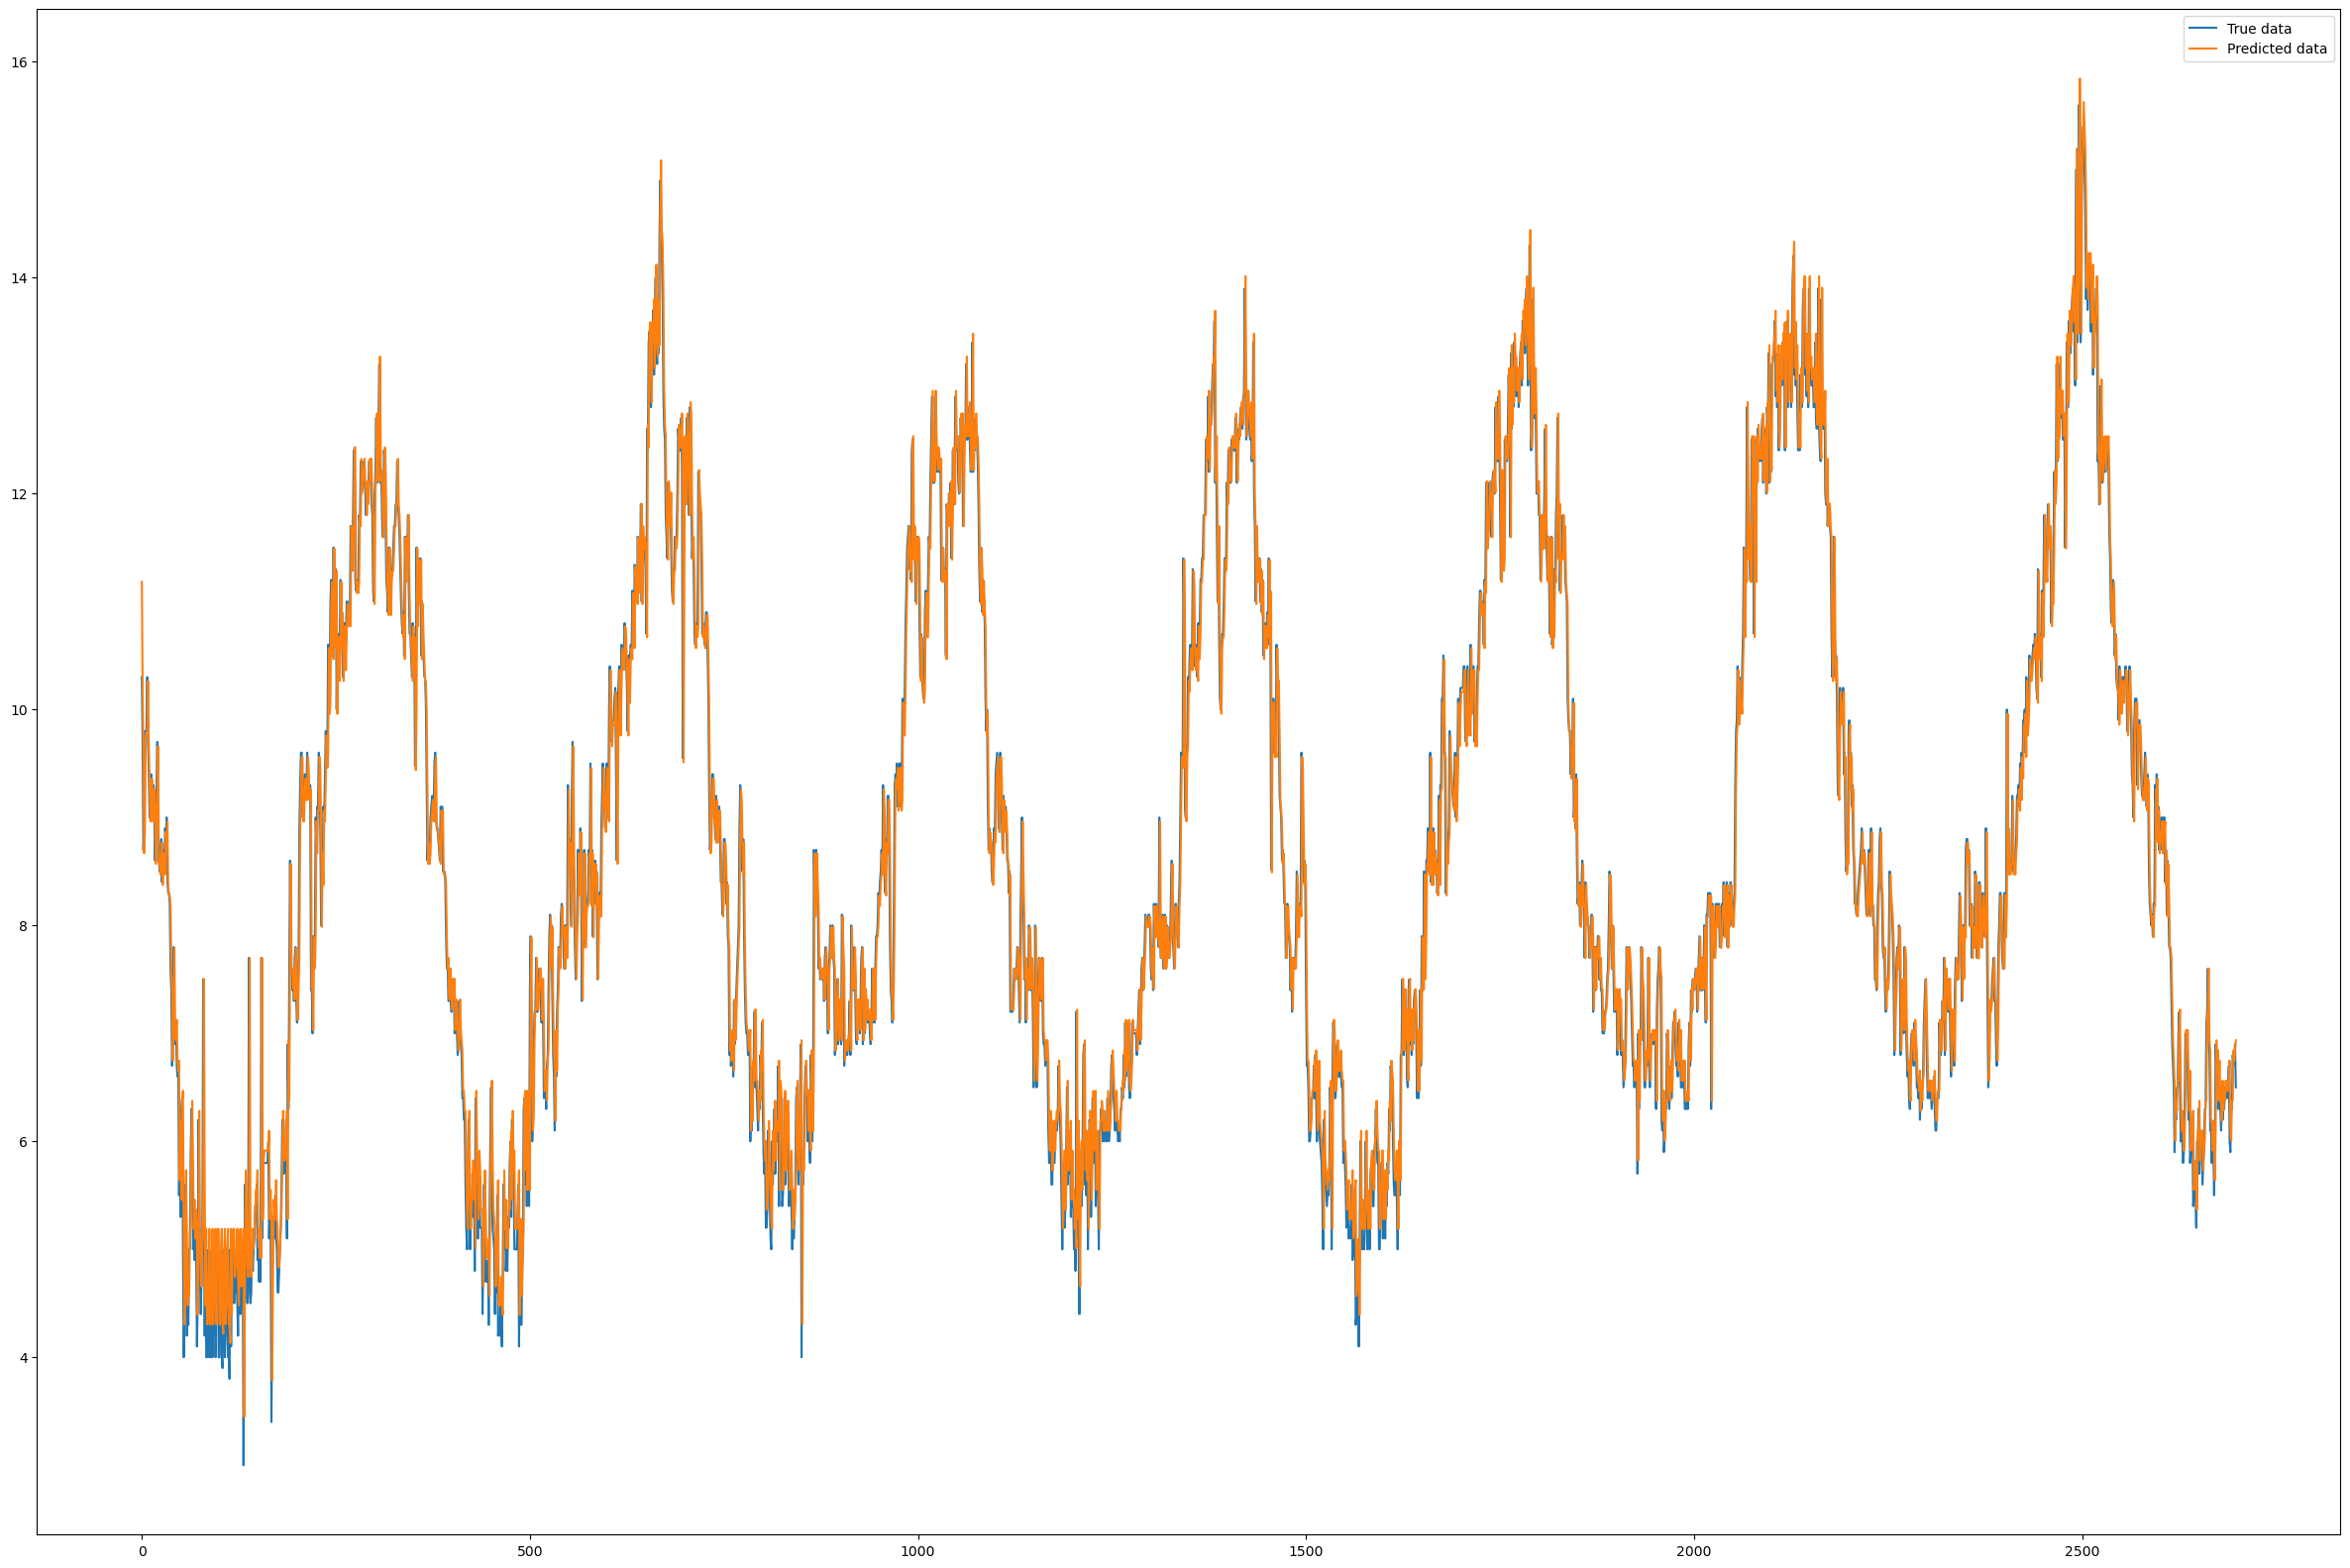

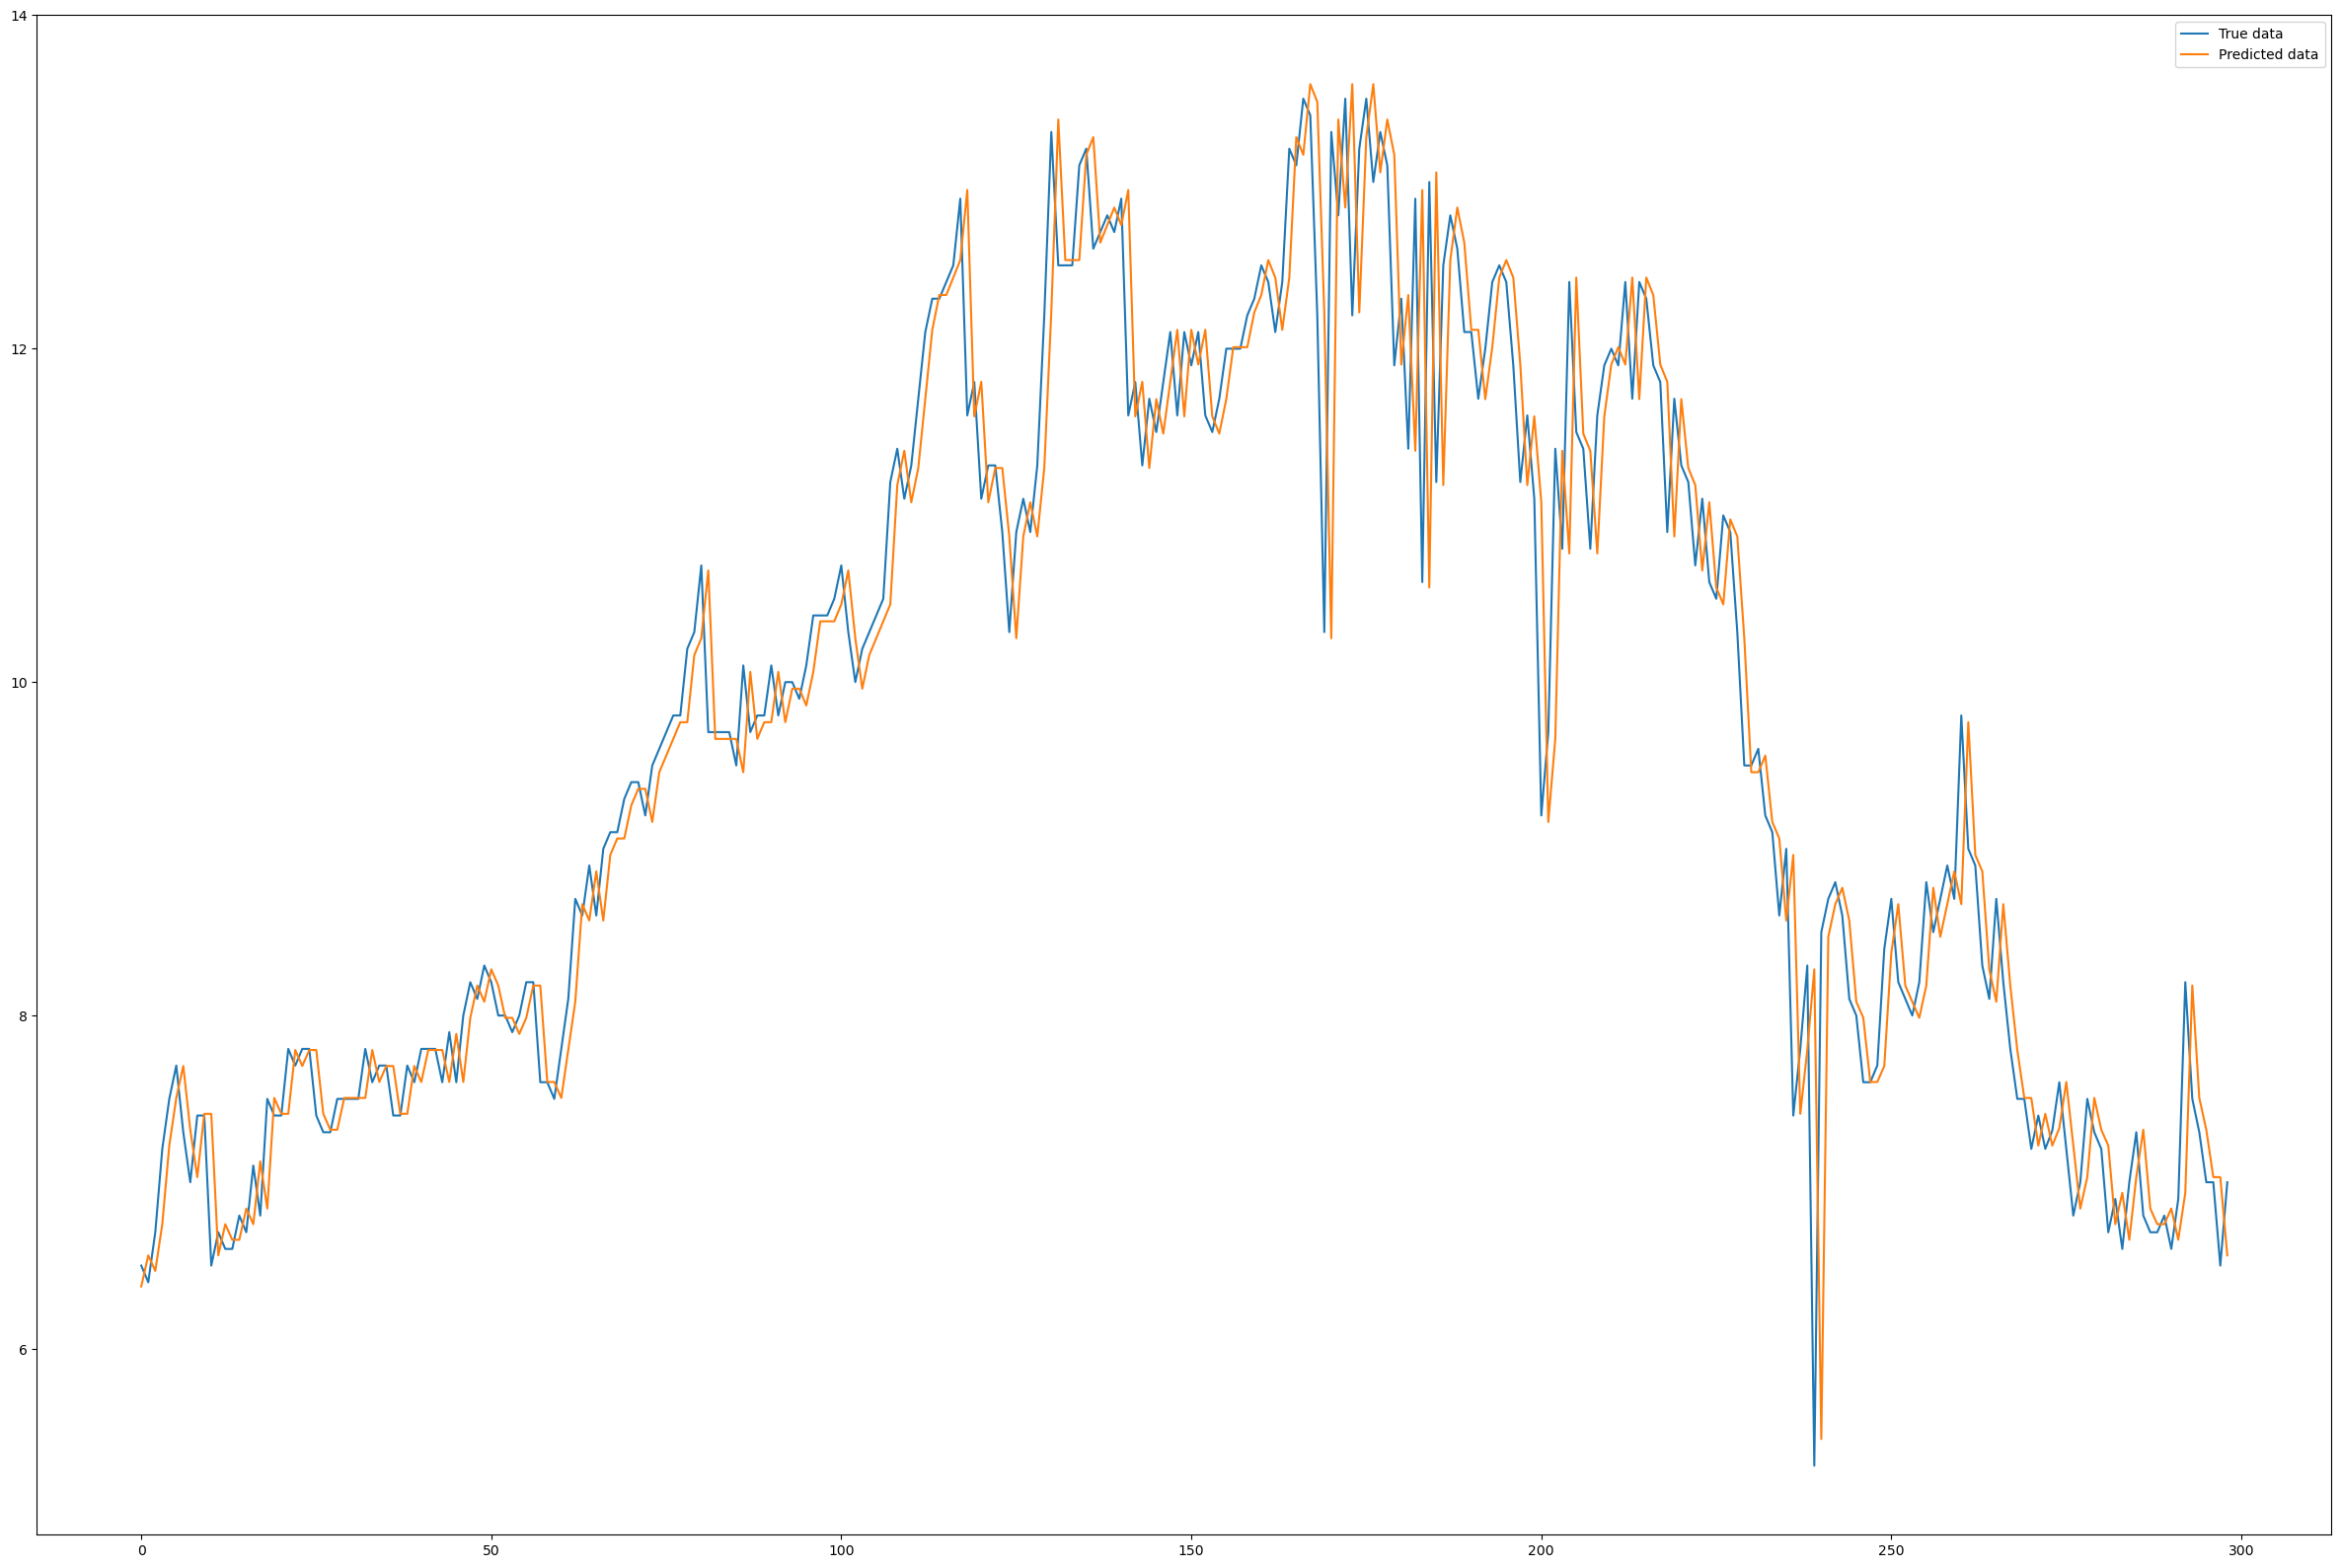

In [25]:
plot_curve(y2_train, y2_train_hat)
plot_curve(y2_test, y2_test_hat)

In [26]:
y3_train_hat=model_DO_GRU.predict(X3_train)
y3_train_hat=scaler_DO.inverse_transform(y3_train_hat)
y3_train=scaler_DO.inverse_transform(y3_train)

y3_test_hat=model_DO_GRU.predict(X3_test)
y3_test_hat=scaler_DO.inverse_transform(y3_test_hat)
y3_test=scaler_DO.inverse_transform(y3_test)

10/10 [==============================] - 0s 1ms/step


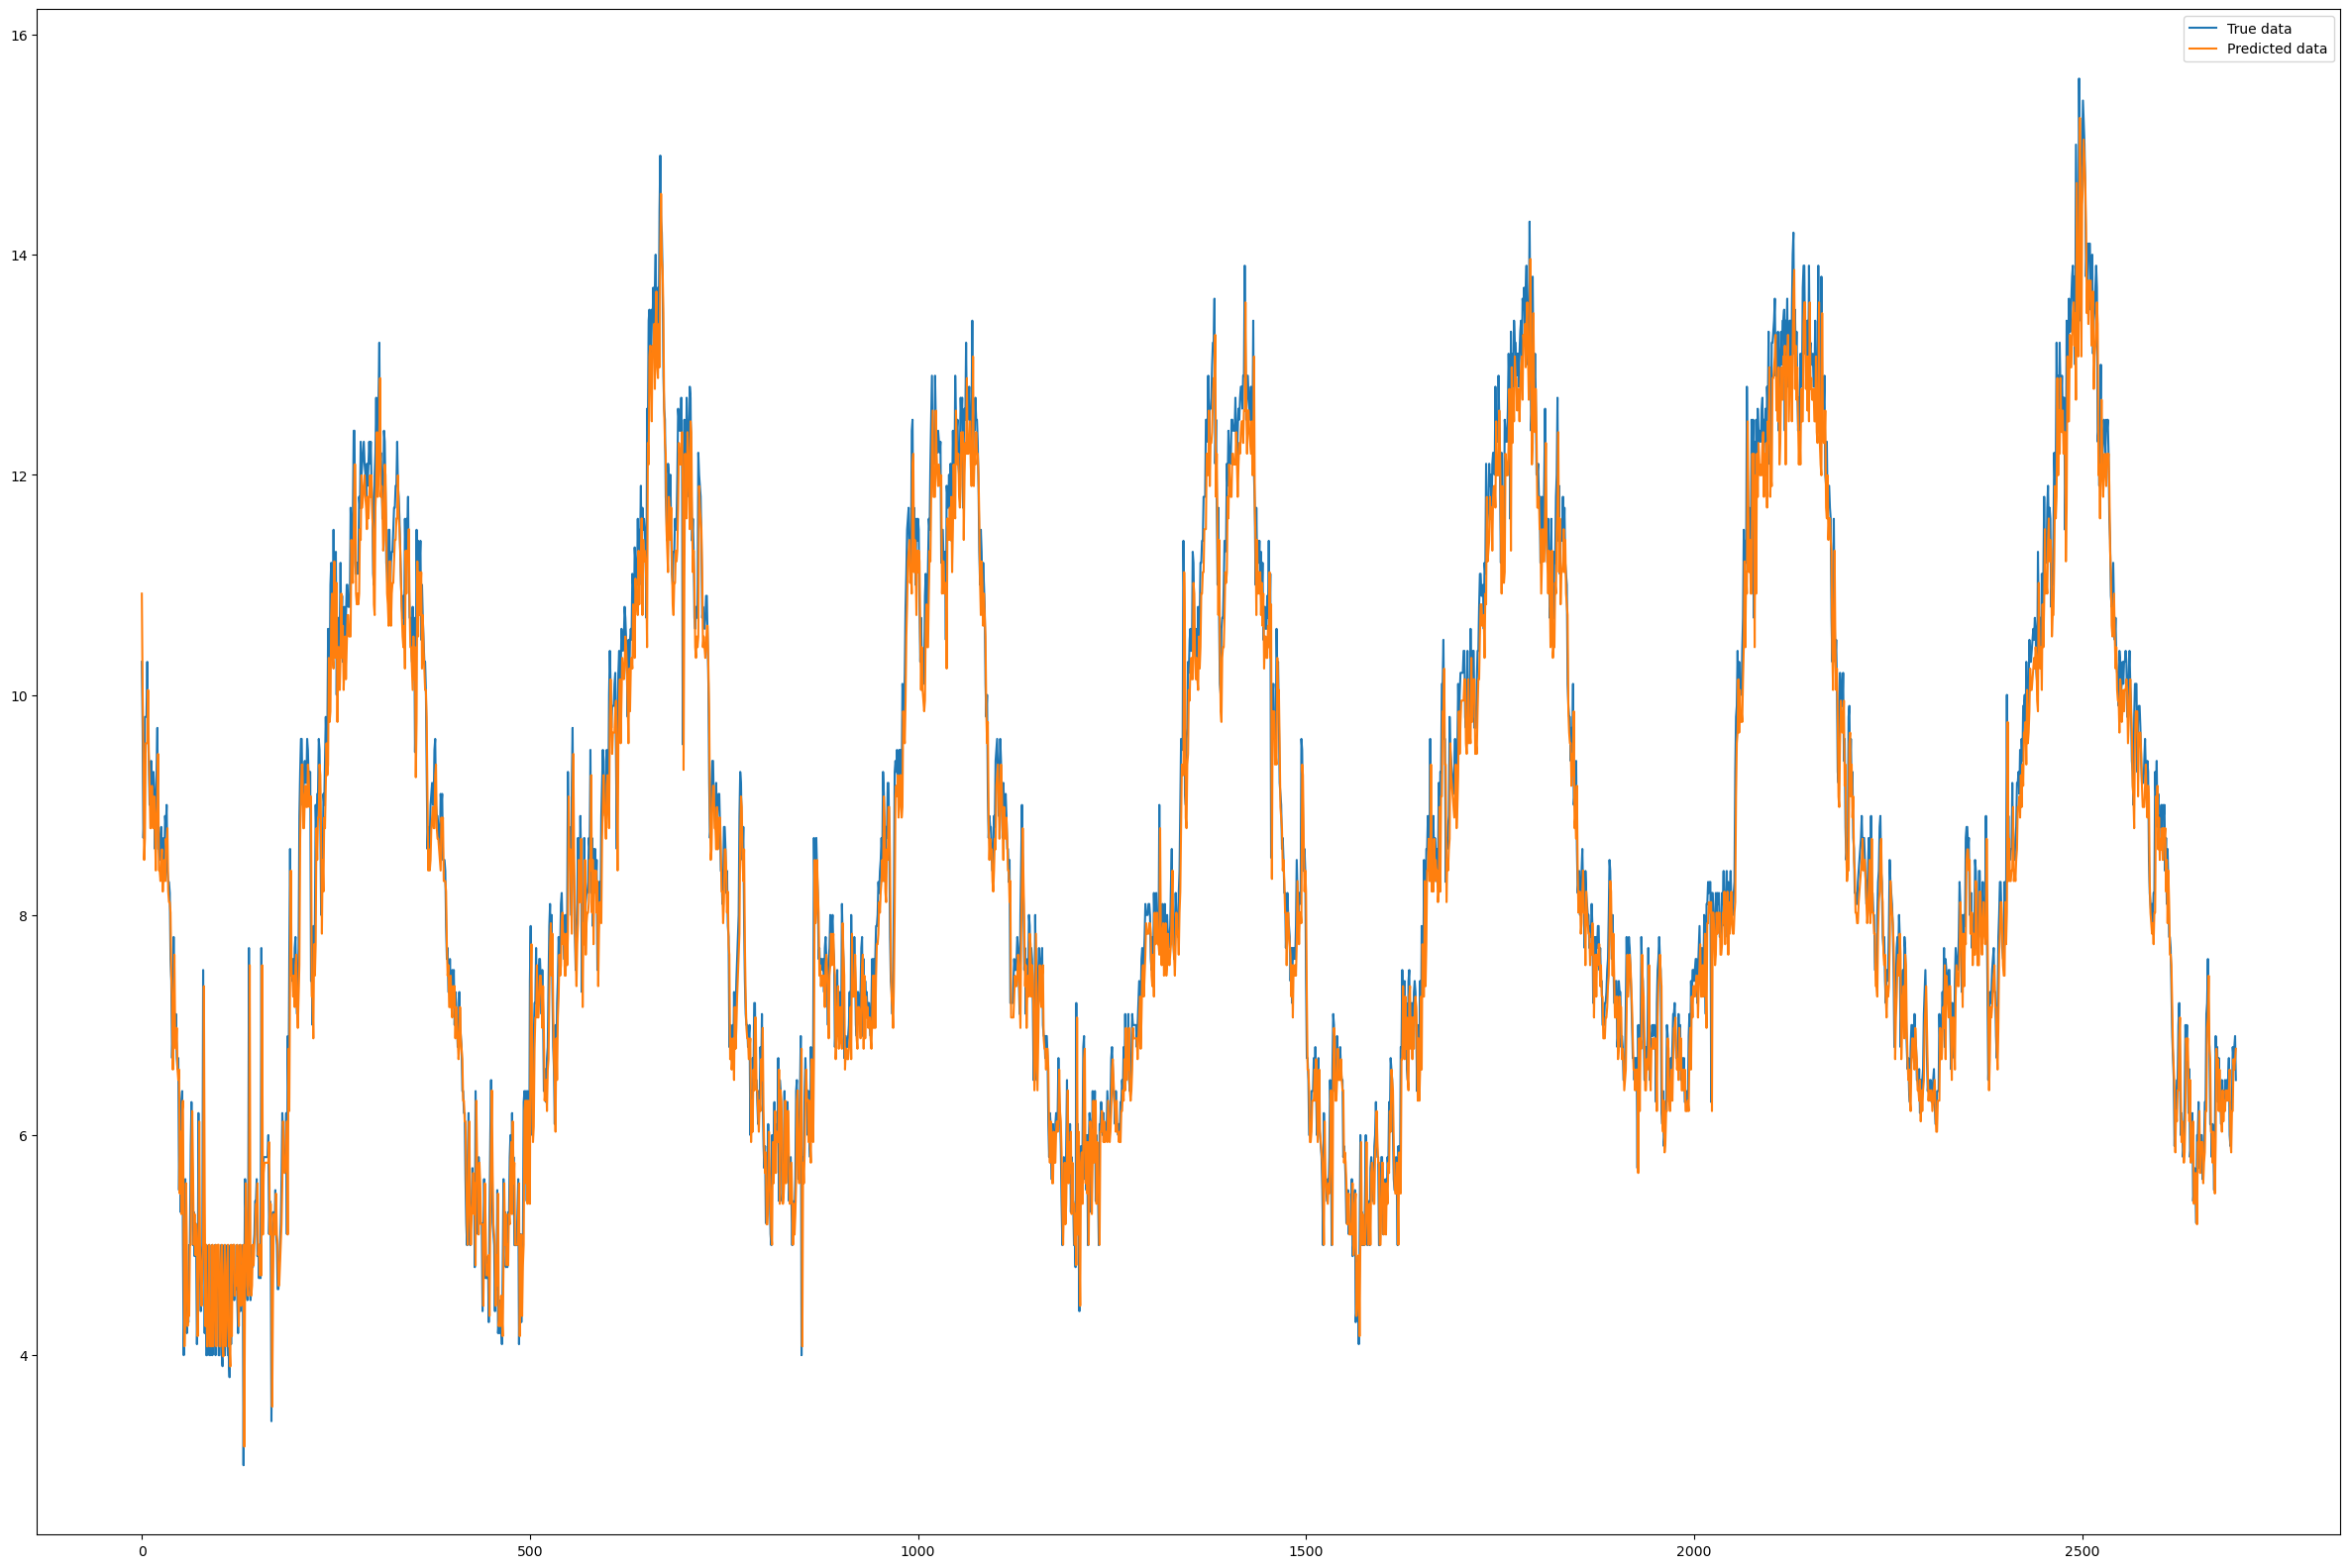

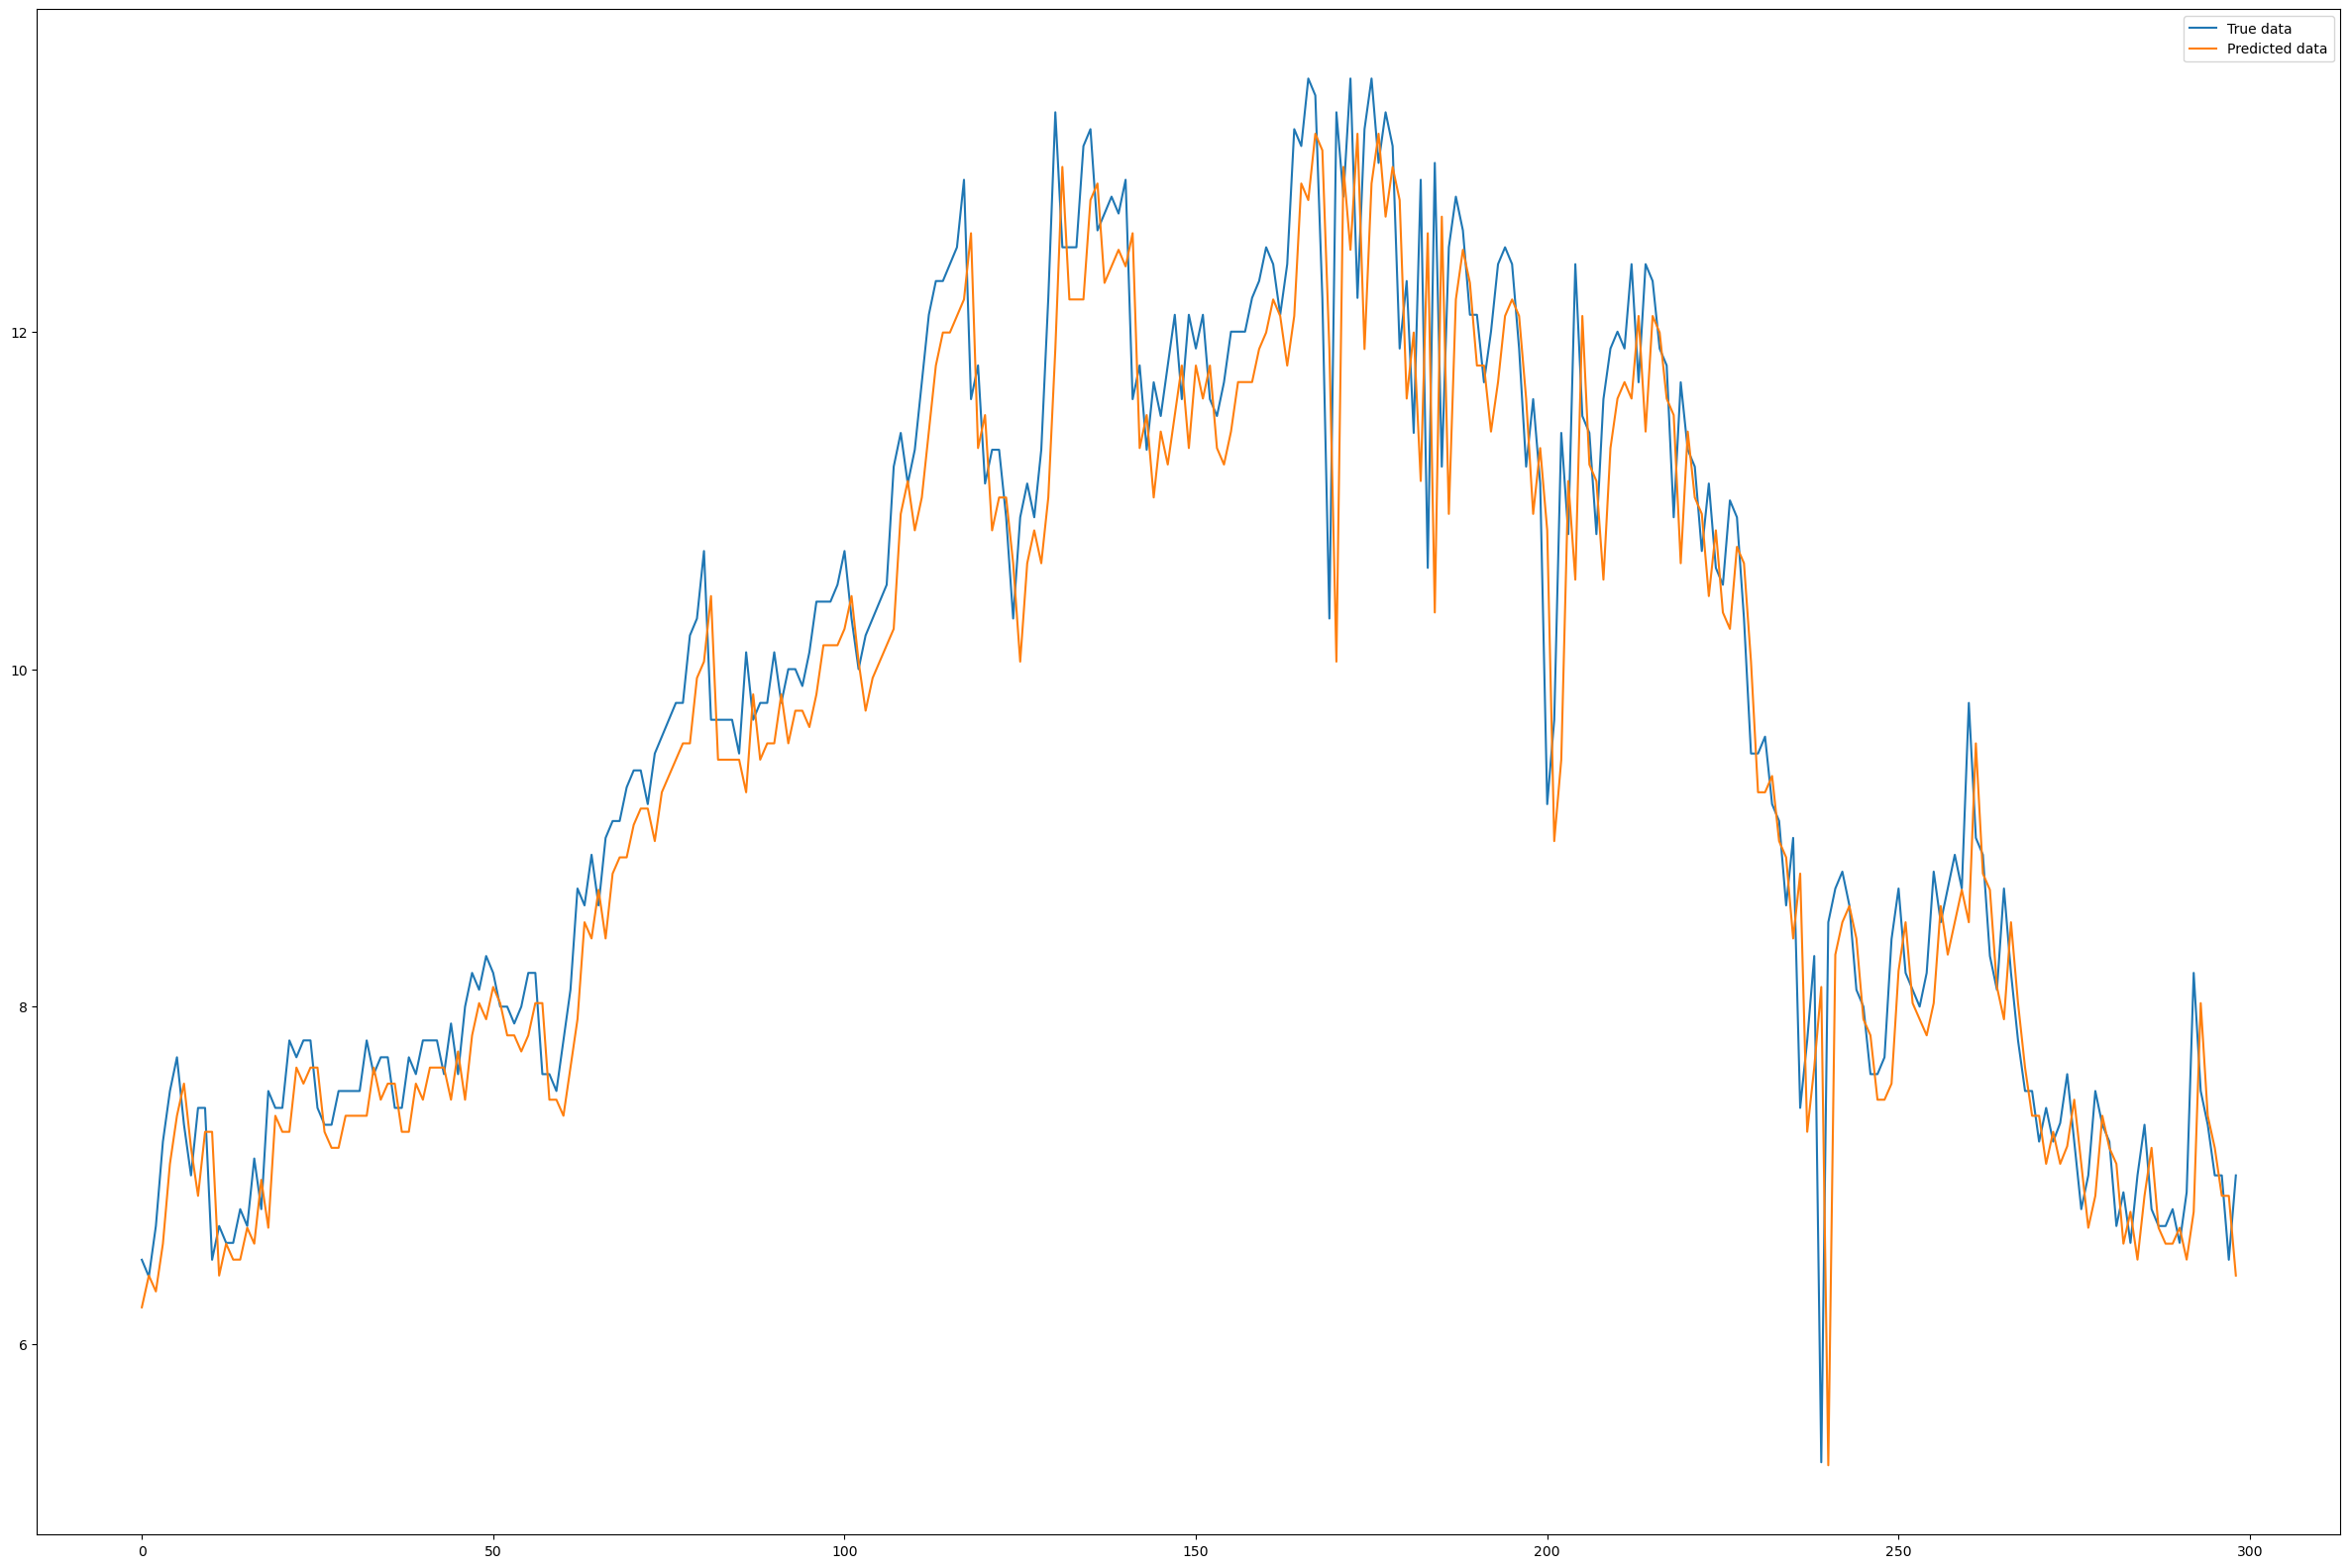

In [27]:
plot_curve(y3_train, y3_train_hat)
plot_curve(y3_test, y3_test_hat)